In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV  # Import GridSearchCV here
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [17]:
import pandas as pd
df = pd.read_csv('sales.csv')
print(df.head())

   USERID   ORDERDATE     ORDERID  AMOUNTINFO
0  142074  2016-01-01  4196439032      9399.0
1   56927  2016-01-01  4198324983      8799.0
2   87058  2016-01-01  4191287379      6899.0
3  136104  2016-01-01  4198508313      5999.0
4  117831  2016-01-01  4202238313      5399.0


In [18]:
missing_data = df.isnull().sum()

print("Missing data in each column:")
print(missing_data)

missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing data:")
print(missing_percentage)

Missing data in each column:
USERID        0
ORDERDATE     2
ORDERID       0
AMOUNTINFO    8
dtype: int64

Percentage of missing data:
USERID        0.000000
ORDERDATE     0.002322
ORDERID       0.000000
AMOUNTINFO    0.009288
dtype: float64


In [19]:
print(df.isna().sum())

USERID        0
ORDERDATE     2
ORDERID       0
AMOUNTINFO    8
dtype: int64


In [20]:
print("Rows with missing data:")
print(df[df.isna().any(axis=1)])

Rows with missing data:
       USERID   ORDERDATE     ORDERID  AMOUNTINFO
20      75849  2016-01-01  4197103430         NaN
72     103714         NaN  4136159682       189.0
114    155209  2016-01-01  4177940815         NaN
229    139877         NaN  4111956196         6.3
233     54599  2016-01-01  4119525205         NaN
260     65456  2016-01-02  4195643356         NaN
62134  122134  2016-09-21  3826649773         NaN
70342  116995  2016-10-24  3981569421         NaN
80110   98888  2016-12-06  3814398698         NaN
86069  145951  2016-12-29  4139830098         NaN


In [21]:
most_frequent_date = df['ORDERDATE'].mode()[0]
df['ORDERDATE'] = df['ORDERDATE'].fillna(most_frequent_date)

mean_amount = df['AMOUNTINFO'].mean()
df['AMOUNTINFO'] = df['AMOUNTINFO'].fillna(mean_amount)

print("Data after filling missing values:")
print(df)


Data after filling missing values:
       USERID   ORDERDATE     ORDERID  AMOUNTINFO
0      142074  2016-01-01  4196439032      9399.0
1       56927  2016-01-01  4198324983      8799.0
2       87058  2016-01-01  4191287379      6899.0
3      136104  2016-01-01  4198508313      5999.0
4      117831  2016-01-01  4202238313      5399.0
...       ...         ...         ...         ...
86130  110416  2016-12-29  4111876729         3.9
86131  149172  2016-12-29  4182928398         0.5
86132   58525  2016-12-29  4080138429         0.5
86133  161732  2016-12-29  4193916074         0.5
86134   61176  2016-12-29  4195479740         0.5

[86135 rows x 4 columns]


In [22]:
print("Missing Data After Cleaning:")
print(df.isna().sum())
df_clean = df

Missing Data After Cleaning:
USERID        0
ORDERDATE     0
ORDERID       0
AMOUNTINFO    0
dtype: int64


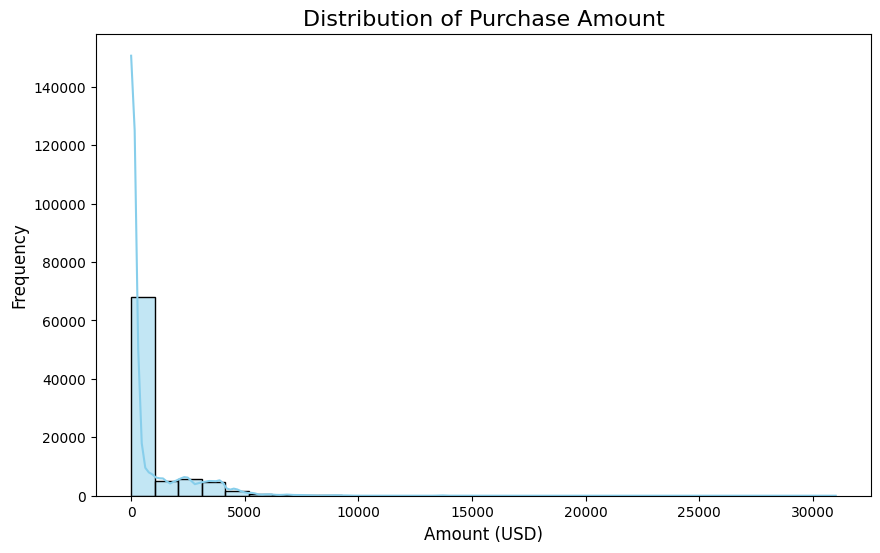

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Purchase Amount (AMOUNTINFO)
plt.figure(figsize=(10, 6))
sns.histplot(df['AMOUNTINFO'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Purchase Amount', fontsize=16)
plt.xlabel('Amount (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


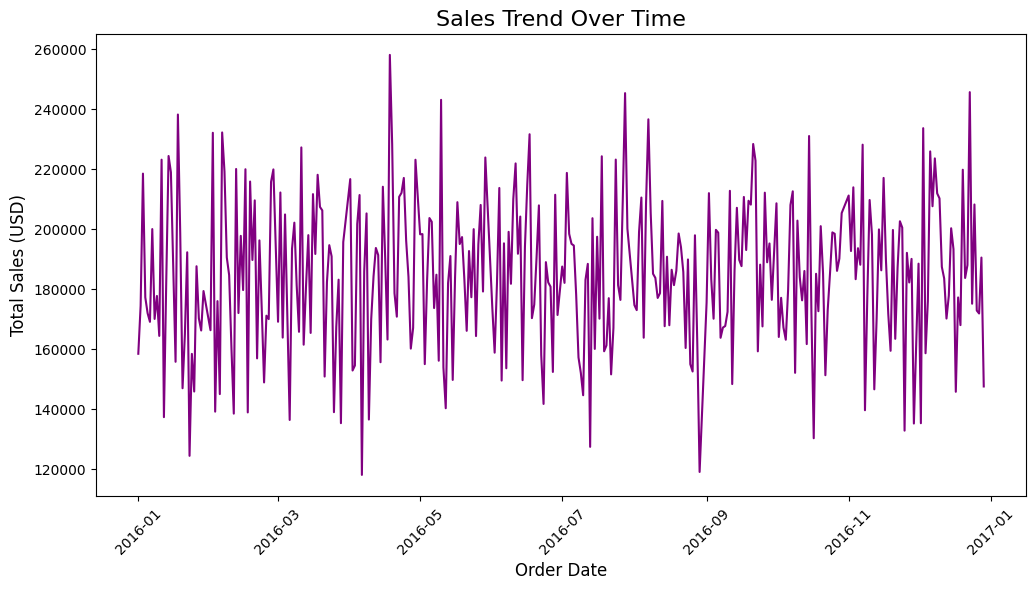

In [24]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Aggregate sales by date
sales_by_date = df.groupby('ORDERDATE')['AMOUNTINFO'].sum().reset_index()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_date, x='ORDERDATE', y='AMOUNTINFO', color='purple')
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_data(df, target_column):
    # Convert ORDERDATE to datetime and extract features
    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
    df['DAYOFWEEK'] = df['ORDERDATE'].dt.dayofweek
    df['MONTH'] = df['ORDERDATE'].dt.month
    df['YEAR'] = df['ORDERDATE'].dt.year
    df['DAY'] = df['ORDERDATE'].dt.day
    df['WEEK'] = df['ORDERDATE'].dt.isocalendar().week

    # Drop non-numeric columns (ORDERID, ORDERDATE)
    X = df.drop(columns=[target_column, 'ORDERID', 'ORDERDATE'], errors='ignore')
    y = df[target_column]

    # Scale numeric features
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    return X_scaled, y


In [26]:
# Preprocess the data
X, y = preprocess_data(df, target_column='AMOUNTINFO')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

In [ ]:
# Preprocess the data
X, y = preprocess_data(df, target_column='AMOUNTINFO')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

# Now, if you want to predict for new data:
new_sales_data = pd.DataFrame({
    'USERID': [123456, 789012],
    'ORDERDATE': ['2017-03-15', '2018-07-22'],
    'ORDERID': [4202238320, 4202238321],
    'AMOUNTINFO': [7500.0, 8200.0]
})

# Preprocess new data
X_new, _ = preprocess_data(new_sales_data, target_column='AMOUNTINFO')

# Make predictions for new data
new_predictions = best_model.predict(X_new)
print("Predictions for new data:", new_predictions)